<a href="https://colab.research.google.com/github/LuchoValr/Semillero/blob/main/Proyecto_semillero_Avance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wbgapi
import wbgapi as wb
!pip install geopandas
import geopandas as gpd
import folium
!pip install pycountry
import pycountry
import plotly.express as px
#Pais, tipo de relacion, año y valor

     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 33.0 MB/s 
     |████████████████████████████████| 16.7 MB 354 kB/s 
     |████████████████████████████████| 10.1 MB 113 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=98e9145a165b1b73b2bb7b1656d1de1c4d32a7d1a22e0361fa38e0ccff978ded
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


##Exportaciones por pais

In [2]:
ex_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/exportaciones%20por%20pais.txt')

In [3]:
exp_2 = ex_p.rename(columns={'Importadores':'Paises','Valor exportado en 2001':'2001','Valor exportado en 2002':'2002','Valor exportado en 2003':'2003','Valor exportado en 2004':'2004','Valor exportado en 2005':'2005','Valor exportado en 2006':'2006','Valor exportado en 2007':'2007','Valor exportado en 2008':'2008','Valor exportado en 2009':'2009','Valor exportado en 2010':'2010','Valor exportado en 2011':'2011','Valor exportado en 2012':'2012','Valor exportado en 2013':'2013','Valor exportado en 2014':'2014','Valor exportado en 2015':'2015','Valor exportado en 2016':'2016','Valor exportado en 2017':'2017','Valor exportado en 2018':'2018','Valor exportado en 2019':'2019','Valor exportado en 2020':'2020'})
exp_21=exp_2.insert(1, "Relacion", 'Importadores', allow_duplicates=False)
exp_3=exp_2.drop(['Unnamed: 21'],axis=1)
exp_4=pd.melt(exp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
exp_5=exp_4.drop(['index'],axis=1)
exp_5

,Paises,Relacion,variable,value
0,Mundo,Importadores,2001,12301486
1,Estados Unidos de América,Importadores,2001,5344533
2,China,Importadores,2001,19907
3,Panamá,Importadores,2001,265163
4,Ecuador,Importadores,2001,699929
...,...,...,...,...
4555,Timor-Leste,Importadores,2020,0
4556,Seychelles,Importadores,2020,0
4557,Sudán (antes de 2012),Importadores,2020,0
4558,Uzbekistán,Importadores,2020,0


##Importaciones por pais

In [4]:
im_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/importaciones%20por%20pais.txt')

In [5]:
im_p2=im_p.rename(columns={'Exportadores':'Paises','Valor importado en 2001':'2001','Valor importado en 2002':'2002','Valor importado en 2003':'2003','Valor importado en 2004':'2004','Valor importado en 2005':'2005','Valor importado en 2006':'2006','Valor importado en 2007':'2007','Valor importado en 2008':'2008','Valor importado en 2009':'2009','Valor importado en 2010':'2010','Valor importado en 2011':'2011','Valor importado en 2012':'2012','Valor importado en 2013':'2013','Valor importado en 2014':'2014','Valor importado en 2015':'2015','Valor importado en 2016':'2016','Valor importado en 2017':'2017','Valor importado en 2018':'2018','Valor importado en 2019':'2019','Valor importado en 2020':'2020'})
imp_21=im_p2.insert(1, "Relacion", 'Exportadores', allow_duplicates=False)
imp_3=im_p2.drop(['Unnamed: 21'],axis=1)
imp_4=pd.melt(imp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
imp_5=imp_4.drop(['index'],axis=1)
imp_5

,Paises,Relacion,variable,value
0,Mundo,Exportadores,2001,12820352
1,Estados Unidos de América,Exportadores,2001,4442775
2,China,Exportadores,2001,475405
3,México,Exportadores,2001,596168
4,Brasil,Exportadores,2001,582060
...,...,...,...,...
4535,Islas Turks y Caicos,Exportadores,2020,0
4536,Burkina Faso,Exportadores,2020,0
4537,Samoa,Exportadores,2020,0
4538,Yemen,Exportadores,2020,0


In [6]:
mundo= pd.concat([exp_5, imp_5])
M1=mundo.rename(columns={'variable':'Años','value':'Valor'}).drop([0]).reset_index()
M1.drop(['index'],axis=1)


,Paises,Relacion,Años,Valor
0,Estados Unidos de América,Importadores,2001,5344533
1,China,Importadores,2001,19907
2,Panamá,Importadores,2001,265163
3,Ecuador,Importadores,2001,699929
4,Brasil,Importadores,2001,166704
...,...,...,...,...
9093,Islas Turks y Caicos,Exportadores,2020,0
9094,Burkina Faso,Exportadores,2020,0
9095,Samoa,Exportadores,2020,0
9096,Yemen,Exportadores,2020,0


HALLAR MISSING VALUES

In [7]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9098 non-null   int64 
 1   Paises    9098 non-null   object
 2   Relacion  9098 non-null   object
 3   Años      9098 non-null   object
 4   Valor     9098 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 355.5+ KB


FOLIUM

In [8]:
M2=M1[M1['Valor']!=0] 
M2

,index,Paises,Relacion,Años,Valor
0,1,Estados Unidos de América,Importadores,2001,5344533
1,2,China,Importadores,2001,19907
2,3,Panamá,Importadores,2001,265163
3,4,Ecuador,Importadores,2001,699929
4,5,Brasil,Importadores,2001,166704
...,...,...,...,...,...
9046,4488,Afganistán,Exportadores,2020,1
9047,4489,Angola,Exportadores,2020,1
9048,4490,Kuwait,Exportadores,2020,1
9049,4491,Malawi,Exportadores,2020,1


In [9]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 0 to 9050
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     7154 non-null   int64 
 1   Paises    7154 non-null   object
 2   Relacion  7154 non-null   object
 3   Años      7154 non-null   object
 4   Valor     7154 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 335.3+ KB


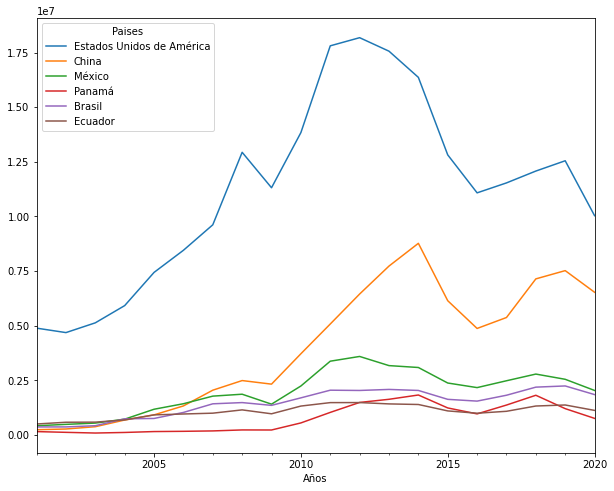

In [10]:
business_partners=M2[M2.Paises.isin(['Estados Unidos de América', 'China', 'México', 'Panamá','Brasil','Ecuador'])].copy()
business_partners['Años'] = pd.to_datetime(business_partners['Años'])
business_partners2=business_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st1 = business_partners2[['Estados Unidos de América','China','México','Panamá','Brasil','Ecuador']].plot(figsize=(10, 8))
st1

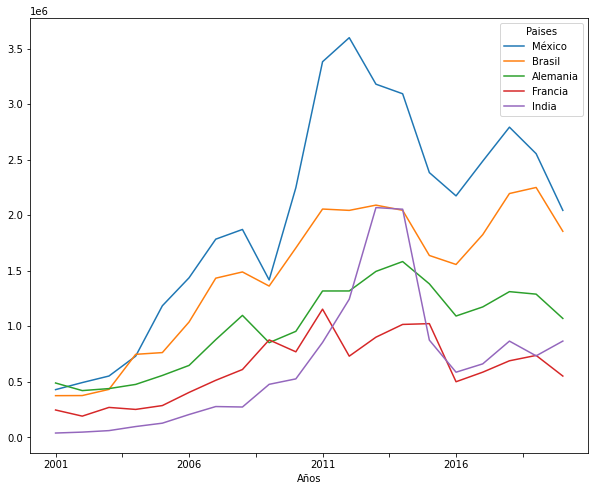

In [11]:
expo_partners=M2[M2.Paises.isin(['México', 'Brasil','Alemania','Francia','India'])].copy()
expo_partners2=expo_partners[expo_partners['Relacion']=='Exportadores'].copy()
expo_partners2['Años'] = pd.to_datetime(expo_partners['Años'])
expo_partners3=expo_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st2 = expo_partners3[['México','Brasil','Alemania','Francia','India']].plot(figsize=(10, 8))

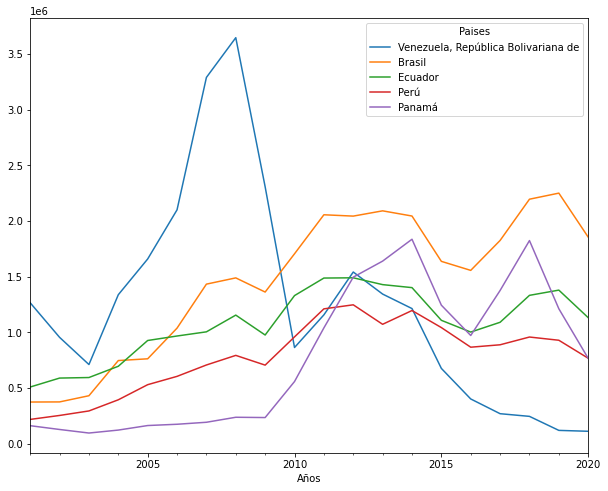

In [12]:
frontier_partners=M2[M2.Paises.isin(['Venezuela, República Bolivariana de', 'Brasil', 'Ecuador', 'Perú','Panamá'])].copy()
frontier_partners['Años'] = pd.to_datetime(frontier_partners['Años'])
frontier_partners2=frontier_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st3 = frontier_partners2[['Venezuela, República Bolivariana de','Brasil','Ecuador','Perú','Panamá']].plot(figsize=(10, 8))
st3

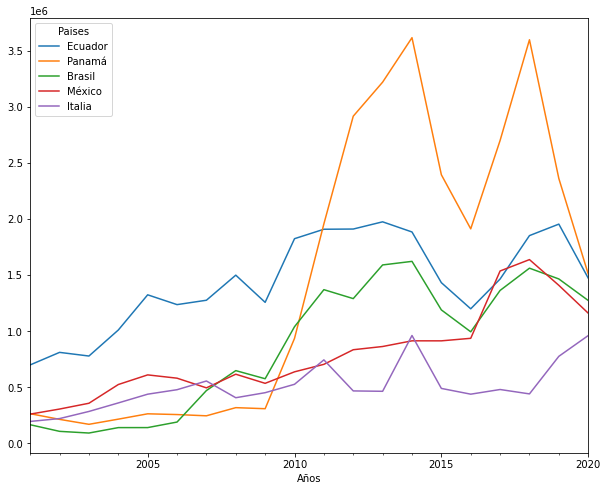

In [13]:
imp_partners=M2[M2.Paises.isin(['Panamá', 'Ecuador','Brasil','México','Italia'])].copy()
imp_partners2=imp_partners[imp_partners['Relacion']=='Importadores'].copy()
imp_partners2['Años'] = pd.to_datetime(imp_partners['Años'])
imp_partners3=imp_partners2.pivot_table(index='Años',columns='Paises',values='Valor')
st4 = imp_partners3[['Ecuador','Panamá','Brasil','México','Italia']].plot(figsize=(10, 8))

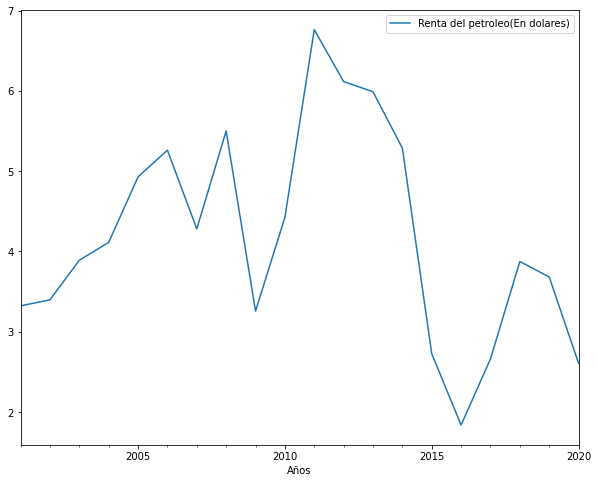

In [14]:
rent_oil = wb.data.DataFrame('NY.GDP.PETR.RT.ZS', ['COL'],time=range(2001,2021)).reset_index()
rent_oil1 = rent_oil.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
rent_oil2=pd.melt(rent_oil1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
rent_oil3=rent_oil2.rename(columns={'variable':'Años','value':'Renta del petroleo(En dolares)'})
rent_oil4=rent_oil3.drop(['index'],axis=1)
rent_oil4['Años'] = pd.to_datetime(rent_oil4['Años'])
r1=rent_oil4.set_index('Años')
rent_oil5=r1.filter(['Renta del petroleo(En dolares)'])
f1=rent_oil5.plot(figsize=(10, 8))

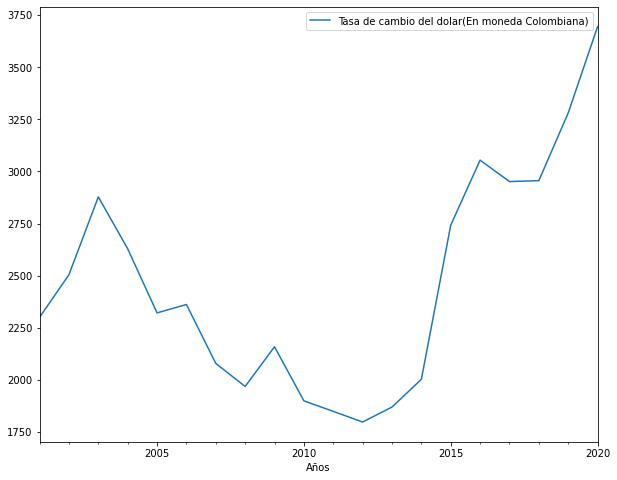

In [15]:
price_dollar=wb.data.DataFrame('PA.NUS.FCRF', ['COL'],time=range(2001,2021)).reset_index()
price_dollar1 = price_dollar.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
price_dollar2=pd.melt(price_dollar1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
price_dollar3=price_dollar2.rename(columns={'variable':'Años','value':'Tasa de cambio del dolar(En moneda Colombiana)'})
price_dollar4=price_dollar3.drop(['index'],axis=1)
price_dollar4['Años'] = pd.to_datetime(price_dollar4['Años'])
r2=price_dollar4.set_index('Años')
price_dollar5=r2.filter(['Tasa de cambio del dolar(En moneda Colombiana)'])
f2=price_dollar5.plot(figsize=(10, 8))

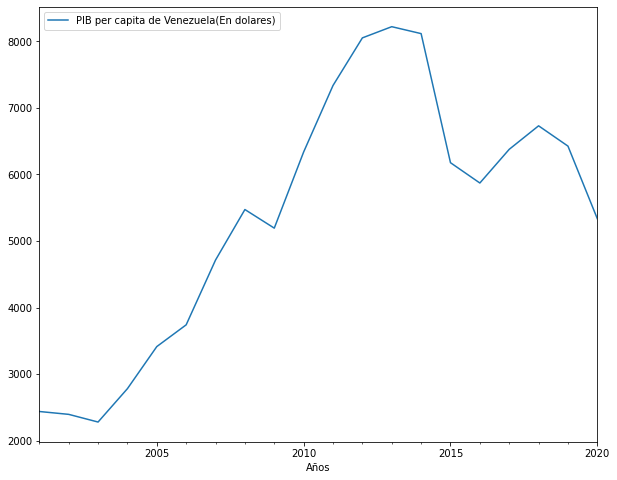

In [16]:
pibcap_ven=wb.data.DataFrame('NY.GDP.PCAP.CD', ['COL'],time=range(2001,2021)).reset_index()
pibcap_ven1 = pibcap_ven.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
pibcap_ven2=pd.melt(pibcap_ven1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
pibcap_ven3=pibcap_ven2.rename(columns={'variable':'Años','value':'PIB per capita de Venezuela(En dolares)'})
pibcap_ven4=pibcap_ven3.drop(['index'],axis=1)
pibcap_ven4['Años'] = pd.to_datetime(pibcap_ven4['Años'])
r3=pibcap_ven4.set_index('Años')
pibcap_ven5=r3.filter(['PIB per capita de Venezuela(En dolares)'])
f3=pibcap_ven5.plot(figsize=(10, 8))

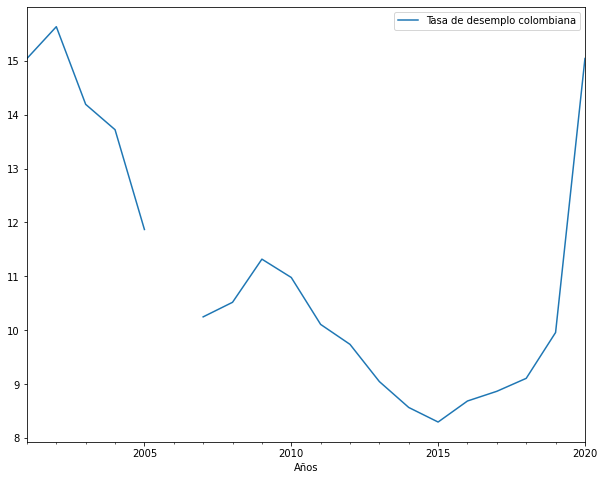

In [17]:
work=wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', ['COL'],time=range(2001,2021)).reset_index()
work1 = work.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
work2=pd.melt(work1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
work3=work2.rename(columns={'variable':'Años','value':'Tasa de desemplo colombiana'})
work4=work3.drop(['index'],axis=1)
work4['Años'] = pd.to_datetime(work4['Años'])
r4=work4.set_index('Años')
work5=r4.drop(['economy'],axis=1)
f4=work5.plot(figsize=(10, 8))
f4

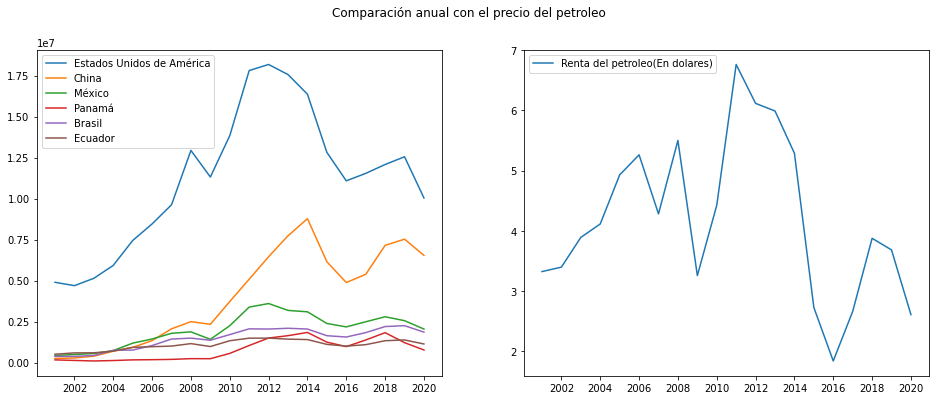

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación anual con el precio del petroleo')
ax1.plot(business_partners2[['Estados Unidos de América','China','México','Panamá','Brasil','Ecuador']])
ax1.legend(('Estados Unidos de América','China','México','Panamá','Brasil','Ecuador'),prop = {'size': 10}, loc='upper left')
ax2.plot(rent_oil5)
ax2.legend(['Renta del petroleo(En dolares)'],prop = {'size': 10},loc='upper left')

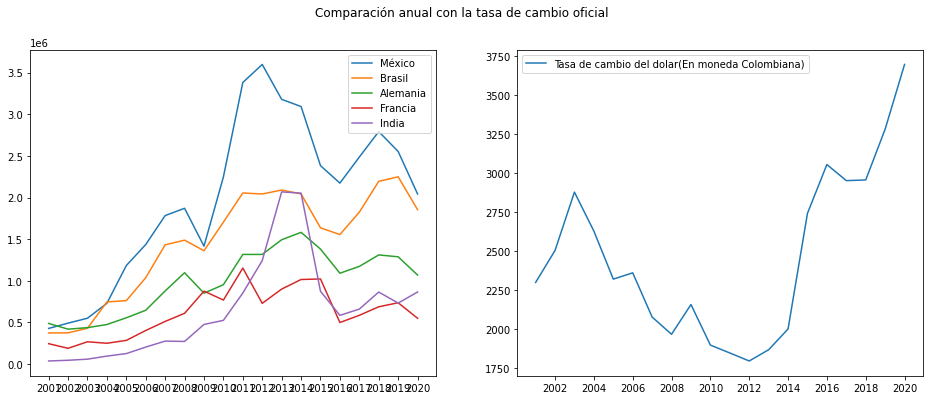

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación anual con la tasa de cambio oficial')
ax1.plot(expo_partners3[['México','Brasil','Alemania','Francia','India']])
ax1.legend(('México','Brasil','Alemania','Francia','India'),prop = {'size': 10}, loc='upper right')
ax2.plot(price_dollar5)
ax2.legend(['Tasa de cambio del dolar(En moneda Colombiana)'],prop = {'size': 10},loc='upper left')

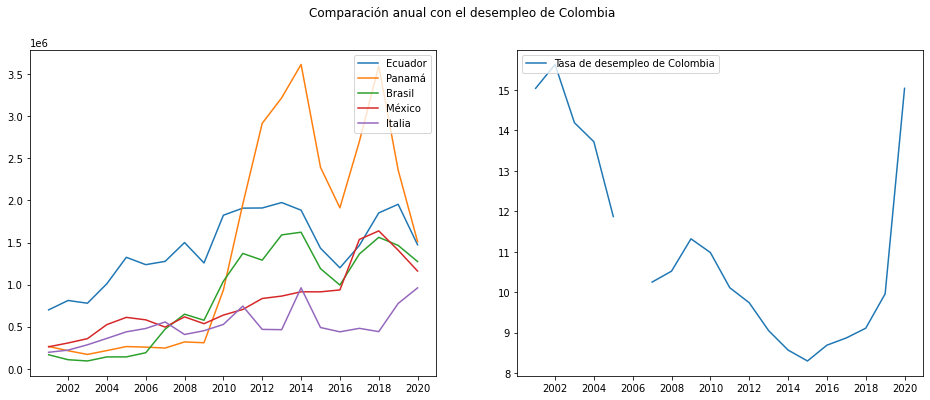

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación anual con el desempleo de Colombia')
ax1.plot(imp_partners3[['Ecuador','Panamá','Brasil','México','Italia']])
ax1.legend(('Ecuador','Panamá','Brasil','México','Italia'),prop = {'size': 10}, loc='upper right')
ax2.plot(work5)
ax2.legend(['Tasa de desempleo de Colombia'],prop = {'size': 10},loc='upper left')

##Geopandas

In [21]:
imp_map=M2[M2.Paises.isin([ 'México', 'Panamá','Brasil','Ecuador','Italia','Turquía','India','Chile','Países Bajos','Corea, República de','España','Alemania','Bélgica','Canadá','Japón','Rusia, Federación de','Reino Unido'])].copy()
imp_map2=imp_map[imp_map['Años']=='2018'].copy()
imp_map2['Paises'] = imp_map2['Paises'].map({'Brasil':"BRA",
                             'Ecuador':"ECU",
                             'México':"MEX",
                             'Panamá':"PAN",
                             'Italia':'ITA',
                             'Turquía':'TUR',
                             'Perú':'PER',
                             'India':'IND',
                             'Chile':'CHL',
                             'Países Bajos':'NLD',
                             'Corea, República de':'KOR',
                             'España':'ESP',
                             'Alemania':'DEU',
                             'Bélgica':'BEL',
                             'Canadá':'CAN',
                             'Japón':'JPN',
                             'Rusia, Federación de':'RUS',
                             'Reino Unido':'GBR'})
imp_map3=imp_map2[imp_map2['Relacion']=='Exportadores']
imp_map3

,index,Paises,Relacion,Años,Valor
8420,3862,MEX,Exportadores,2018,3947394
8421,3863,BRA,Exportadores,2018,2828205
8422,3864,DEU,Exportadores,2018,2173253
8424,3866,IND,Exportadores,2018,1183435
8425,3867,JPN,Exportadores,2018,1288565
8426,3868,ESP,Exportadores,2018,991618
8427,3869,ECU,Exportadores,2018,811934
8428,3870,CAN,Exportadores,2018,845634
8431,3873,ITA,Exportadores,2018,826897
8432,3874,KOR,Exportadores,2018,819273


In [22]:
fig1=px.choropleth(imp_map3,locations='Paises',
                   color='Valor',hover_name='Relacion',color_continuous_scale="Bluered")
fig1.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig1.show()

##Balanza comercial

In [23]:
no_useful_exp=exp_5[exp_5["value"]<=10000].index
exp_f=exp_5.drop(no_useful_exp)
exp_f

,Paises,Relacion,variable,value
0,Mundo,Importadores,2001,12301486
1,Estados Unidos de América,Importadores,2001,5344533
2,China,Importadores,2001,19907
3,Panamá,Importadores,2001,265163
4,Ecuador,Importadores,2001,699929
...,...,...,...,...
4402,Malta,Importadores,2020,13227
4403,Marruecos,Importadores,2020,12540
4404,Nigeria,Importadores,2020,11331
4405,Rumania,Importadores,2020,10862


In [24]:
no_useful_imp=imp_5[imp_5["value"]<=10000].index
imp_f=imp_5.drop(no_useful_imp,)

In [25]:
table = pd.merge(exp_f,imp_f, on=['Paises','variable'])
table.rename(columns={'value_x':'Valor importaciones','value_y':'Valor exportaciones','variable_y':'Año','variable':'Año'},inplace=True)
table.drop(['Relacion_x','Relacion_y'],axis=1,inplace=True)
table = table.reindex(columns=['Paises','Año','Valor exportaciones','Valor importaciones'])
table

,Paises,Año,Valor exportaciones,Valor importaciones
0,Mundo,2001,12820352,12301486
1,Estados Unidos de América,2001,4442775,5344533
2,China,2001,475405,19907
3,Panamá,2001,58747,265163
4,Ecuador,2001,318226,699929
...,...,...,...,...
1030,Singapur,2020,115573,18284
1031,Grecia,2020,16899,15966
1032,Nueva Zelandia,2020,10914,15358
1033,Marruecos,2020,39720,12540


In [26]:
table['Balanza Comercial'] = table['Valor exportaciones']- table['Valor importaciones']
table

,Paises,Año,Valor exportaciones,Valor importaciones,Balanza Comercial
0,Mundo,2001,12820352,12301486,518866
1,Estados Unidos de América,2001,4442775,5344533,-901758
2,China,2001,475405,19907,455498
3,Panamá,2001,58747,265163,-206416
4,Ecuador,2001,318226,699929,-381703
...,...,...,...,...,...
1030,Singapur,2020,115573,18284,97289
1031,Grecia,2020,16899,15966,933
1032,Nueva Zelandia,2020,10914,15358,-4444
1033,Marruecos,2020,39720,12540,27180


In [27]:
lista_vacia = []
for valor in table['Balanza Comercial']:
  if valor > 0:
    lista_vacia.append('Exportador')
  elif valor <0:
    lista_vacia.append('Importador')
table['Tipo de Relación'] = lista_vacia
table

,Paises,Año,Valor exportaciones,Valor importaciones,Balanza Comercial,Tipo de Relación
0,Mundo,2001,12820352,12301486,518866,Exportador
1,Estados Unidos de América,2001,4442775,5344533,-901758,Importador
2,China,2001,475405,19907,455498,Exportador
3,Panamá,2001,58747,265163,-206416,Importador
4,Ecuador,2001,318226,699929,-381703,Importador
...,...,...,...,...,...,...
1030,Singapur,2020,115573,18284,97289,Exportador
1031,Grecia,2020,16899,15966,933,Exportador
1032,Nueva Zelandia,2020,10914,15358,-4444,Importador
1033,Marruecos,2020,39720,12540,27180,Exportador


In [72]:
bmap=table.filter(['Paises','Año','Balanza Comercial'])
bmap=bmap[bmap.Paises.isin([ 'México', 'Panamá','Brasil','Ecuador','Italia','Turquía','India','Chile','Países Bajos','Corea, República de','España','Alemania','Bélgica','Canadá','Japón','Rusia, Federación de','Reino Unido','Guatemala','Israel','Argentina','Venezuela, República Bolivariana de','Australia','Francia','Perú','Dinamarca',
'Taipei Chino','Bolivia, Estado Plurinacional de','Paraguay','Uruguay','Suiza','Noruega','Finlandia'])].copy()
bmap=bmap[bmap['Año']=='2018'].copy()
bmap['Paises2'] = bmap['Paises'].map({'Brasil':"BRA",
                             'Ecuador':"ECU",
                             'México':"MEX",
                             'Panamá':"PAN",
                             'Italia':'ITA',
                             'Turquía':'TUR',
                             'Perú':'PER',
                             'India':'IND',
                             'Chile':'CHL',
                             'Países Bajos':'NLD',
                             'Corea, República de':'KOR',
                             'España':'ESP',
                             'Alemania':'DEU',
                             'Bélgica':'BEL',
                             'Canadá':'CAN',
                             'Japón':'JPN',
                             'Rusia, Federación de':'RUS',
                             'Reino Unido':'GBR',
                             'Guatemala':'GTM',
                             'Israel':'ISR',
                             'Argentina':'ARG',
                             'Venezuela, República Bolivariana de':'VEN',
                             'Australia':'AUS',
                             'Francia':'FRA',
                             'Dinamarca':'DNK',
                             'Taipei Chino':'TWN',
                             'Bolivia, Estado Plurinacional de':'BOL',
                             'Paraguay':'PRY',
                             'Uruguay':'URY',
                             'Suiza':'CHE',
                             'Noruega':'NOR',
                             'Finlandia':'FIN'})
bmap

,Paises,Año,Balanza Comercial,Paises2
866,Panamá,2018,-3546977,PAN
867,Ecuador,2018,-1040033,ECU
868,Brasil,2018,1266450,BRA
869,México,2018,2309282,MEX
870,Italia,2018,385371,ITA
871,Turquía,2018,-1370319,TUR
872,Perú,2018,-414349,PER
873,India,2018,635358,IND
874,Chile,2018,-464247,CHL
875,Países Bajos,2018,-788671,NLD


In [74]:
fig1=px.choropleth(bmap,locations='Paises2',
                   color='Balanza Comercial',hover_name='Paises',color_continuous_scale="Bluered")
fig1.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig1.show()